<a href="https://colab.research.google.com/github/IamJac/MachineLearningAlgorithms/blob/main/LinearRegression02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECCESSARY MODULES**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

**LOADING THE DATA**

In [20]:
iris=datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names)
data=pd.DataFrame(iris.data,columns=iris.feature_names)
print(data.loc[0:8])
print(data.head())

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               

**EXPLORATORY DATA ANALYSIS**

Correlation of the features
                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.000000         -0.117570           0.871754          0.817941
sepal width (cm)           -0.117570          1.000000          -0.428440         -0.366126
petal length (cm)           0.871754         -0.428440           1.000000          0.962865
petal width (cm)            0.817941         -0.366126           0.962865          1.000000
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000        

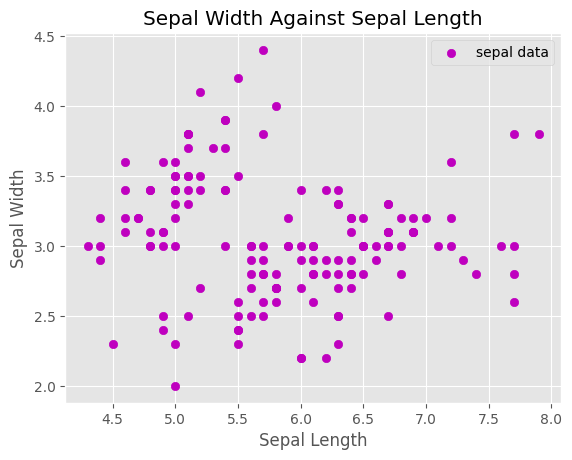

In [24]:
print("Correlation of the features")
print(data.corr())
print(data.describe())
plt.style.use('ggplot')
plt.scatter(x=data['sepal length (cm)'],y=data['sepal width (cm)'],color='m',marker='o',label='sepal data')
plt.gca().set(title='Sepal Width Against Sepal Length',xlabel='Sepal Length',ylabel='Sepal Width')
plt.legend()
plt.show()


**DATA PRE-PROCESSING**

In [52]:
x_data=data['sepal length (cm)'].values.reshape(-1,1)
y_data=data['sepal width (cm)'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)
print("Training data")
print(x_train)
print()
print(y_train)

Training data
[[5.9]
 [6.4]
 [5. ]
 [6.3]
 [6.2]
 [5.5]
 [5. ]
 [6.8]
 [6.5]
 [5.5]
 [6.1]
 [6.8]
 [5.2]
 [5.6]
 [5.2]
 [5.4]
 [5. ]
 [6.4]
 [5.7]
 [5.8]
 [5.4]
 [4.9]
 [6.2]
 [5.1]
 [5.6]
 [5.1]
 [4.6]
 [4.8]
 [6.2]
 [4.8]
 [5. ]
 [7. ]
 [6.7]
 [6.7]
 [6.3]
 [5.4]
 [5.4]
 [6. ]
 [7.2]
 [5.1]
 [5.3]
 [4.4]
 [5.1]
 [5.8]
 [6.5]
 [5.5]
 [6.3]
 [6.3]
 [5.8]
 [5.1]
 [6.7]
 [7.3]
 [6. ]
 [6. ]
 [5.5]
 [5.8]
 [6.4]
 [5. ]
 [5.1]
 [4.9]
 [6.3]
 [4.4]
 [5.6]
 [5.1]
 [4.8]
 [6. ]
 [7.7]
 [4.4]
 [6.5]
 [5.7]
 [6.3]
 [6.6]
 [4.5]
 [5. ]
 [5. ]
 [6.4]
 [6.2]
 [5.7]
 [5.6]
 [6.3]
 [5.2]
 [5.2]
 [5.9]
 [5.1]
 [7.7]
 [7.9]
 [5.5]
 [4.6]
 [4.7]
 [4.9]
 [5.4]
 [6.7]
 [7.7]
 [7.2]
 [5.7]
 [4.9]
 [5.8]
 [6.9]
 [4.3]
 [4.9]
 [4.8]
 [4.9]
 [6.9]
 [4.8]
 [7.6]
 [6.9]
 [5.6]
 [5.8]
 [6.4]
 [5. ]
 [6.7]
 [6.8]
 [6.7]
 [6.6]
 [5.7]
 [6.5]
 [5.9]
 [6.1]
 [5.6]
 [5. ]]

[[3.2]
 [2.8]
 [3.2]
 [3.4]
 [2.8]
 [4.2]
 [2.3]
 [3. ]
 [2.8]
 [2.4]
 [2.6]
 [3.2]
 [3.4]
 [3. ]
 [3.5]
 [3.7]
 [3.4]
 [2.7]
 [2.8]
 [2.7]
 [3.

**MODEL TRAINING**

In [53]:
Regressor=LinearRegression()
Regressor.fit(x_train,y_train)
print("Model Successfuly Trained")
print("Optimal parameters:-")
print("Weight = ",Regressor.coef_)
print("Bias = ",Regressor.intercept_)


Model Successfuly Trained
Optimal parameters:-
Weight =  [[-0.06740222]]
Bias =  [3.47715019]


**ASSESSING THE MODEL**

In [54]:
data_pred=Regressor.predict(x_test)
print("   PREDICTED SEPAL WIDTHS")
print()
data_comparison=pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':data_pred.squeeze()})
print(data_comparison)

   PREDICTED SEPAL WIDTHS

    Actual  Predicted
0      3.8   2.958153
1      2.5   3.092958
2      2.7   3.072737
3      2.8   3.065997
4      2.9   3.092958
5      3.2   3.160360
6      2.2   3.072737
7      3.2   2.991854
8      3.2   3.167100
9      2.8   3.092958
10     2.8   2.978374
11     3.1   3.167100
12     3.1   3.012075
13     3.8   3.133399
14     3.4   3.113178
15     2.8   3.065997
16     3.0   2.998594
17     3.1   3.045776
18     3.1   3.025555
19     2.8   3.086217
20     2.8   3.045776
21     3.0   3.065997
22     2.6   3.106438
23     2.9   3.052516
24     2.5   3.106438
25     3.0   3.039036
26     3.0   3.140139
27     2.5   3.025555
28     2.9   3.065997
29     2.7   3.052516


**VISUALIZATION**

Visualizing the regression model results


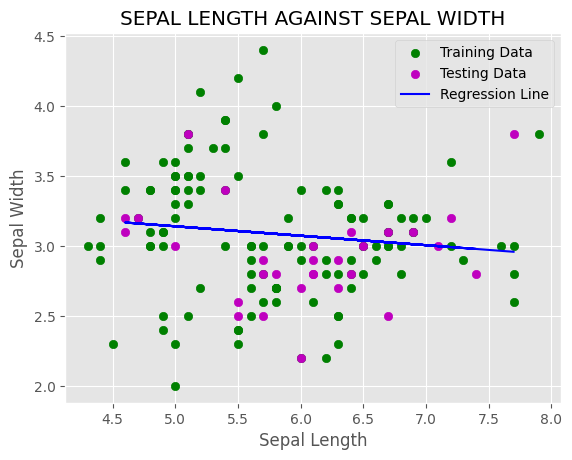

In [55]:
print("Visualizing the regression model results")
plt.style.use('ggplot')
plt.scatter(x=x_train,y=y_train,color='g',marker='o',label='Training Data')
plt.scatter(x=x_test,y=y_test,color='m',marker='o',label='Testing Data')
plt.plot(x_test,data_pred,color='b',label='Regression Line')
plt.gca().set(title='SEPAL LENGTH AGAINST SEPAL WIDTH',xlabel='Sepal Length',ylabel='Sepal Width')
plt.legend()
plt.show()

**EVALUATING THE MODEL'S PERFORMANCE**

In [56]:
print("Model Performance")
print("Mean Absolute Error = ",mean_absolute_error(y_test,data_pred))
print("Mean Squared Error = ",mean_squared_error(y_test,data_pred))
print("Root Mean Squared Error = ",np.sqrt(mean_squared_error(y_test,data_pred)))

Model Performance
Mean Absolute Error =  0.28274646170845463
Mean Squared Error =  0.13646641555484493
Root Mean Squared Error =  0.3694136104082319
